In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None
plt.style.use('seaborn-deep')
plt.style.use("seaborn-darkgrid")

In [3]:
df = pd.read_csv('../data/test.csv')
df.drop('id', axis=1, inplace=True)
new_columns = ['weight', 'quality', 'color', 'clarity', 'depth_percent', 'table', 'x', 'y', 'z']
df.columns = new_columns
df['depth_percent'] = df['depth_percent'] / 100
df.drop(['x', 'y', 'z'], axis=1, inplace=True) #drop x, y, z
print(df.shape)
df.sample(5)

(13485, 6)


,weight,quality,color,clarity,depth_percent,table
5229,1.00,Ideal,H,SI2,0.612,57.0
2484,1.02,Ideal,E,VS1,0.622,54.0
3067,0.92,Premium,G,VS2,0.616,62.0
9255,0.71,Very Good,I,SI1,0.626,63.0
5897,1.24,Ideal,H,VS1,0.630,55.0


In [4]:
#split categorical and numerical variables
col_num = ['weight', 'table', 'depth_percent']
col_cat = df.select_dtypes(include = 'object').columns
print(col_num)
print(col_cat)

['weight', 'table', 'depth_percent']
Index(['quality', 'color', 'clarity'], dtype='object')


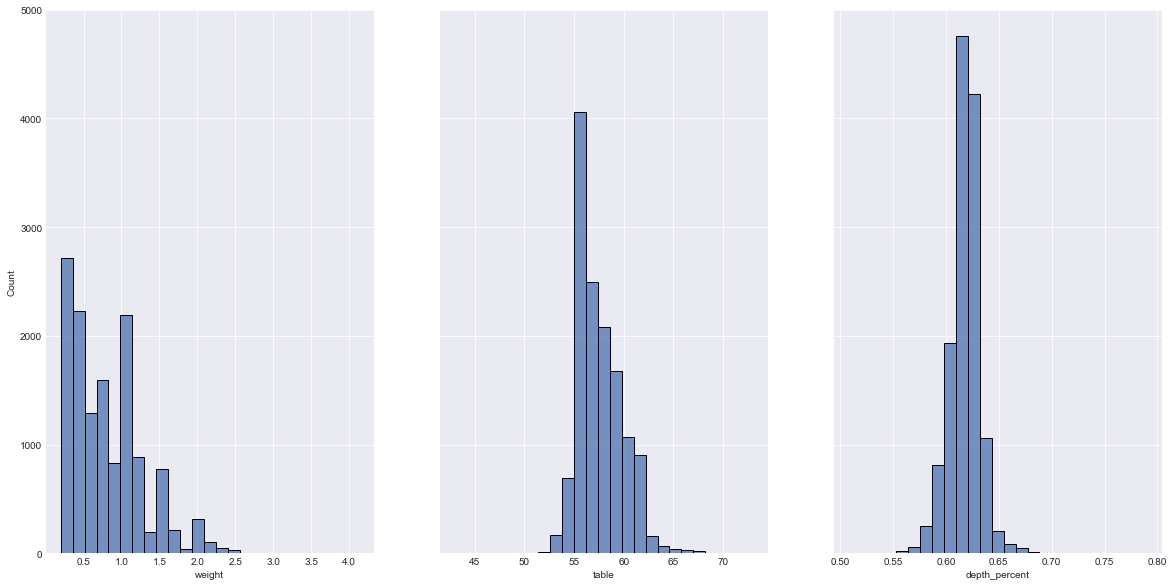

In [5]:
#plot numerical variables distribution
fig, ax = plt.subplots(1, 3, figsize = (20,10), sharey=True)
ax = ax.flat
df_num = df[col_num]
counter = 0
for i in df_num.columns:
    sns.histplot(df_num[i], kde = False, ax = ax[counter], bins=25)
    counter += 1
plt.show();

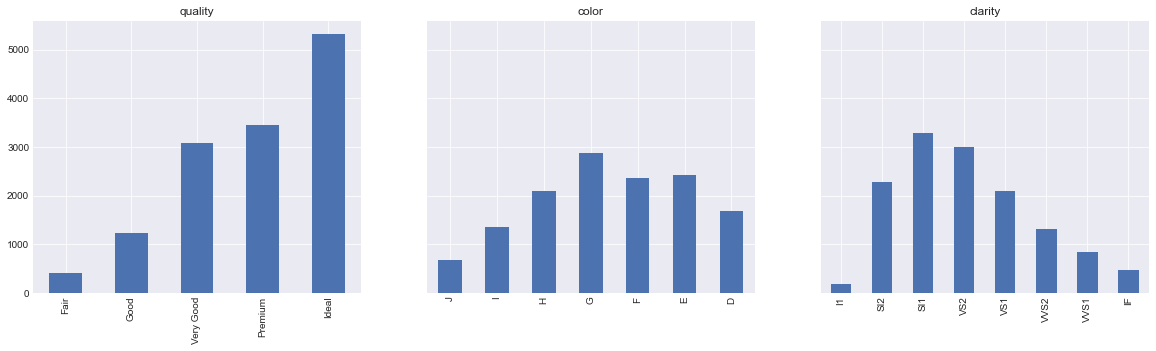

In [6]:
#plot categorical variables distribution
mapping = {'quality':['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'], 
            'color':['J', 'I', 'H', 'G', 'F', 'E', 'D'],
            'clarity':['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']}
fig, ax = plt.subplots(1, 3, figsize = (20,5), sharey=True)
ax = ax.flat
counter = 0
for i in df[col_cat].columns:
    df[i].value_counts().loc[mapping[i]].plot.bar(ax=ax[counter]).set_title(i)
    counter += 1
plt.show();    

In [10]:
#encoding categorical variables
mapping = {'quality':['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'], 
            'color':['J', 'I', 'H', 'G', 'F', 'E', 'D'],
            'clarity':['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']}
for k,v in mapping.items():
    for i in v:
        df[k] = df[k].replace(i, v.index(i))

In [11]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
weight,13485.0,0.799032,0.468195,0.200,0.400,0.710,1.040,4.13
quality,13485.0,2.893956,1.116752,0.000,2.000,3.000,4.000,4.00
color,13485.0,3.398962,1.693856,0.000,2.000,3.000,5.000,6.00
clarity,13485.0,3.058880,1.649305,0.000,2.000,3.000,4.000,7.00
depth_percent,13485.0,0.617585,0.014200,0.508,0.611,0.619,0.625,0.79
table,13485.0,57.473652,2.234259,43.000,56.000,57.000,59.000,73.00
